In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

%matplotlib inline  


/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Downloading and Extracting MNIST data

In [2]:
mnist = input_data.read_data_sets('data/', one_hot=True)

print
print (" Training data size is %d" % (mnist.train.num_examples))
print (" Test data size is %d" % (mnist.test.num_examples))

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz

 Training data size is 55000
 Test data size is 10000


## What does the data look like ?


 type of 'trainimg' is <type 'numpy.ndarray'>
 type of 'trainlabel' is <type 'numpy.ndarray'>
 shape of 'trainimg' is (55000, 784)
 shape of 'trainlabel' is (55000, 10)
43754th Training Data Label is 4
6267th Training Data Label is 0


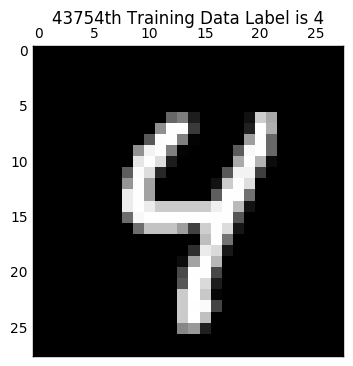

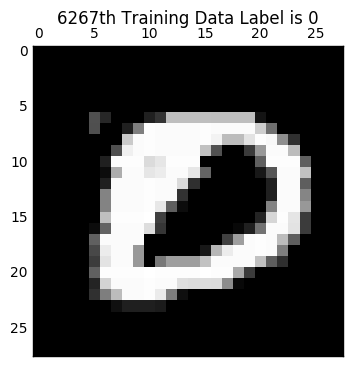

In [3]:
trainimg   = mnist.train.images
trainlabel = mnist.train.labels
testimg    = mnist.test.images
testlabel  = mnist.test.labels

print
print (" type of 'trainimg' is %s"    % (type(trainimg)))
print (" type of 'trainlabel' is %s"  % (type(trainlabel)))
print (" shape of 'trainimg' is %s"   % (trainimg.shape,))
print (" shape of 'trainlabel' is %s" % (trainlabel.shape,))

nsample = 2
randidx = np.random.randint(trainimg.shape[0], size=nsample)

for i in randidx:
    curr_img   = np.reshape(trainimg[i, :], (28, 28)) # 28 by 28 matrix 
    curr_label = np.argmax(trainlabel[i, :] ) # Label
    plt.matshow(curr_img, cmap=plt.get_cmap('gray'))
    plt.title("" + str(i) + "th Training Data " 
              + "Label is " + str(curr_label))
    print ("" + str(i) + "th Training Data " 
           + "Label is " + str(curr_label))

## Defining the model

 %% We can create a container for an input image using tensorflow's graph:
 We allow the first dimension to be None, since this will eventually
 represent our mini-batches, or how many images we feed into a network
 at a time during training/validation/testing.
 The second dimension is the number of features that the image has.

In [6]:
# Parameters of Logistic Regression
learning_rate   = 0.01
training_epochs = 50
batch_size      = 100
display_step    = 5



# Create Graph for Logistic Regression
x = tf.placeholder(np.float32, [None, 784]) 
y = tf.placeholder(np.float32, [None, 10])  

W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))


# Activation, loss, and Optimizing functions
actv = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax

# And then write our loss function:
cross_entropy = -tf.reduce_sum(y * tf.log(actv))


# Finally, the optimizing function 
optm = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy) 

# This would check if our prediction equals the actual value
pred = tf.equal(tf.argmax(actv, 1), tf.argmax(y, 1))  

# And now we can look at the mean of our network's correct guesses
accr = tf.reduce_mean(tf.cast(pred, "float"))
                      
print ("Network constructed")

Network constructed


In [9]:
sess = tf.Session()
sess.run(tf.initialize_all_variables())

# Perform training:
batch_size = 100
n_epochs = 10
for epoch_i in range(n_epochs):
    for batch_i in range(mnist.train.num_examples // batch_size):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        sess.run(optm, feed_dict={
            x: batch_xs,
            y: batch_ys
        })
    print(sess.run(accr,
                   feed_dict={
                       x: mnist.validation.images,
                       y: mnist.validation.labels
                   }))


# %% Print final test accuracy:
accurs = (sess.run(accr,
               feed_dict={
                   x: mnist.test.images,
                   y: mnist.test.labels
               }))
print("Final test accuracy: %f" % (accurs))

0.914
0.9214
0.9158
0.9212
0.9214
0.9122
0.9132
0.9066
0.9224
0.922
Final test accuracy: 0.920100
